In [30]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import ceil
from scipy.signal import find_peaks

df_arbres = pd.read_csv("data/p2-arbres-fr.csv", sep=";",)
print(df_arbres.keys())
df_arbres.complement_addresse.unique()
# df_arbres

Index(['id', 'type_emplacement', 'domanialite', 'arrondissement',
       'complement_addresse', 'numero', 'lieu', 'id_emplacement',
       'libelle_francais', 'genre', 'espece', 'variete', 'circonference_cm',
       'hauteur_m', 'stade_developpement', 'remarquable', 'geo_point_2d_a',
       'geo_point_2d_b'],
      dtype='object')


array([nan, 'c 12', '12-36', ..., 'au n.14', 'F2bis', '40face'],
      dtype=object)

Creation carte des arbres les plus imposants

200136         0
133704         0
133695         0
133692         0
133683         0
           ...  
152205      1815
101985      2015
152110      2525
150101      5155
182852    881818
Name: hauteur_m, Length: 200137, dtype: int64
len 200137
mediane_rang 100069
mediane 8.0
quartile_1 5
quartile_3 12


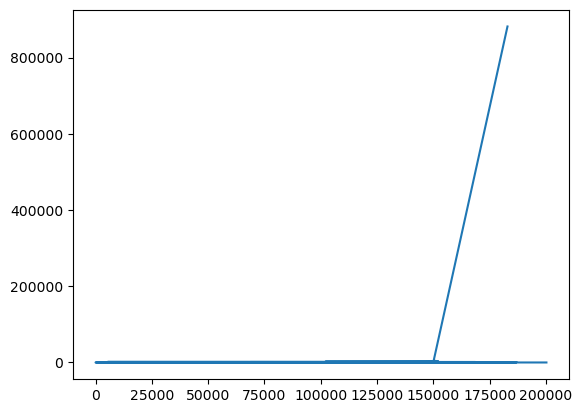

In [31]:

df_arbres[["circonference_cm","hauteur_m"]]
df_arbres = df_arbres.sort_values(by=["hauteur_m"])
# df_arbres = [row["hauteur_m"] if row["hauteur_m"] > 0 else " " for index, row in df_arbres.iterrows()]

# for index, row in df_arbres.iterrows():
#     if row["hauteur_m"] == 0:
#         df_arbres.drop(df_arbres.index[-2])
print(df_arbres["hauteur_m"])
len_df = len(df_arbres)
print("len",len_df)
mediane_rang = (len_df+1)/2
print("mediane_rang",int(round(mediane_rang)))
if int(mediane_rang) % 2 == 0:
    mediane =df_arbres.iloc[mediane_rang]
else:
    mediane = int((df_arbres["hauteur_m"].iloc[round(mediane_rang)]+df_arbres["hauteur_m"].iloc[round(mediane_rang)+1]))/2
print("mediane",mediane)

quartile_1 = df_arbres["hauteur_m"].iloc[ceil(len_df/4)]
quartile_3 = df_arbres["hauteur_m"].iloc[ceil(len_df*(3/4))]

print("quartile_1",quartile_1)
print("quartile_3",quartile_3)

x = df_arbres["hauteur_m"]
peaks, _ = find_peaks(x, prominence=1)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")

plt.show()


Supression des valeurs abbérentes

In [32]:
# for index, row in df_arbres.iterrows():
#     if row["hauteur_m"] == 0:
df_arbres = df_arbres.sort_values(by=["hauteur_m"])
df_arbres_sup_0 = df_arbres[df_arbres.hauteur_m != 0]
        # df_arbres = df_arbres.drop(df_arbres.index[-2])
# print(df_arbres_sup_0["hauteur_m"])
len_df = len(df_arbres_sup_0)
print("len",len_df)
mediane_rang = (len_df+1)/2
print("mediane_rang",int(round(mediane_rang)))
if int(mediane_rang) % 2 == 0:
    mediane =df_arbres_sup_0["hauteur_m"].iloc[int(mediane_rang)]
else:
    mediane = int((df_arbres_sup_0["hauteur_m"].iloc[round(mediane_rang)]+df_arbres_sup_0["hauteur_m"].iloc[round(mediane_rang)+1]))/2
print("mediane",mediane)

quartile_1 = df_arbres_sup_0["hauteur_m"].iloc[ceil(len_df/4)]
quartile_3 = df_arbres_sup_0["hauteur_m"].iloc[ceil(len_df*(3/4))]
ecart_inter_quartile = quartile_3 - quartile_1
valeur_aberrante_sup = quartile_3 + (1.5 * ecart_inter_quartile)
### On supprime les valeurs abberrantes
print("valeur_aberrante_sup",valeur_aberrante_sup)
df_arbres_sans_abberrante = df_arbres_sup_0[df_arbres_sup_0.hauteur_m < valeur_aberrante_sup]
print("df_arbres_sans_abberrante",df_arbres_sans_abberrante["hauteur_m"])
print("quartile_1",quartile_1)
print("quartile_3",quartile_3)
print("len",len(df_arbres_sans_abberrante))


len 160918
mediane_rang 80460
mediane 10.0
valeur_aberrante_sup 26.0
df_arbres_sans_abberrante 198071     1
197935     1
137084     1
197928     1
193654     1
          ..
121684    25
10549     25
121703    25
121680    25
44601     25
Name: hauteur_m, Length: 159526, dtype: int64
quartile_1 6
quartile_3 14
len 159526


In [35]:
# df_arbres_sans_abberrante = df_arbres_sans_abberrante.sort_values(by=["hauteur_m"],ascending=False)
df_arbres_sans_abberrante = df_arbres[df_arbres.remarquable == 1.0]
m = folium.Map(location=[48.85, 2.320], zoom_start=12, tiles="Stamen Terrain")
tooltip = "Clique pour avoir des infos sur l'arbre"
for index, row in df_arbres_sans_abberrante.head(100).iterrows():
    folium.Marker(
        [row["geo_point_2d_a"], row["geo_point_2d_b"]], popup=row["hauteur_m"]
        , tooltip=tooltip
    ).add_to(m)
m